# Pandas4 - Visualization

**[1] Reshape DataFrame for visualization**<br>

**[2] X-axis with categorical data**<br>
- (Line chart)
- Bar chart
- Area chart
- Pie chart

**[3] Numerical data**<br>
- Histogram
- Scatter plot
- Hexagon plot

In [1]:
import pandas as pd

## [1] Reshape DataFrame for visualization

In [2]:
score_df = pd.DataFrame({"ID":["S01","S02","S03","S04","S05","S01","S02","S03","S04","S05"],
                        "Exam":["Exam-1","Exam-1","Exam-1","Exam-1","Exam-1","Exam-2","Exam-2","Exam-2","Exam-2","Exam-2"],
                        "Score":[95, 75, 70, 65, 85, 85, 70, 90, 55, 60]})
score_df

,ID,Exam,Score
0,S01,Exam-1,95
1,S02,Exam-1,75
2,S03,Exam-1,70
3,S04,Exam-1,65
4,S05,Exam-1,85
5,S01,Exam-2,85
6,S02,Exam-2,70
7,S03,Exam-2,90
8,S04,Exam-2,55
9,S05,Exam-2,60


- **Use <code>pivot_table()</code> to convert a dataframe from long-from to wide-form.**

In [3]:
score_df.pivot_table(index = "ID", columns = "Exam", values = "Score")

Exam,Exam-1,Exam-2
ID,,
S01,95,85
S02,75,70
S03,70,90
S04,65,55
S05,85,60


- **Change the target**

In [4]:
score_df.pivot_table(index = "Exam", columns = "ID", values = "Score")

ID,S01,S02,S03,S04,S05
Exam,,,,,
Exam-1,95,75,70,65,85
Exam-2,85,70,90,55,60


- **Use <code>unstack()</code> to reshape a dataframe.**

In [5]:
sales_df = pd.DataFrame({ "Product":["A","A","A","A","A","A","B","B","B","B","B","B"],
                           "Quarter":["Q1","Q1","Q1","Q2","Q2","Q2","Q1","Q1","Q1","Q2","Q2","Q2"],
                           "Month":["Jan","Feb","Mar","Apr","May","Jun","Jan","Feb","Mar","Apr","May","Jun"],
                           "Sales":[67, 57, 87, 50, 97, 68, 78, 102, 113, 98, 80, 84]})
sales_df 

,Product,Quarter,Month,Sales
0,A,Q1,Jan,67
1,A,Q1,Feb,57
2,A,Q1,Mar,87
3,A,Q2,Apr,50
4,A,Q2,May,97
5,A,Q2,Jun,68
6,B,Q1,Jan,78
7,B,Q1,Feb,102
8,B,Q1,Mar,113
9,B,Q2,Apr,98


In [6]:
sales_df.groupby(["Product", "Quarter"]).sum().unstack()

Sales     
Quarter    Q1   Q2
Product           
A         211  215
B         293  262

## [2] X-axis with categorical data
### [2.1] Line chart

- **Series**

In [7]:
series_A = pd.Series([67, 57, 87, 50, 97, 68], 
                     index = ["Jan","Feb","Mar","Apr","May","Jun"])
series_A

Jan    67
Feb    57
Mar    87
Apr    50
May    97
Jun    68
dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Sales'>

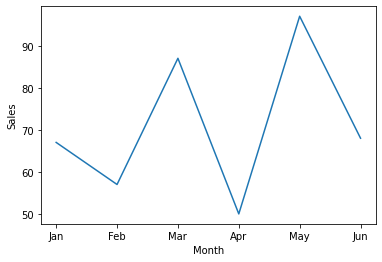

In [8]:
series_A.plot(xlabel ="Month", ylabel ="Sales")

- **DataFrame: single line chart**

In [9]:
product_df = pd.DataFrame({"month":["Jan","Feb","Mar","Apr","May","Jun"],
                           "sales_A":[67, 57, 87, 50, 97, 68],
                           "sales_B":[78, 102, 113, 98, 80, 84]})
product_df 

,month,sales_A,sales_B
0,Jan,67,78
1,Feb,57,102
2,Mar,87,113
3,Apr,50,98
4,May,97,80
5,Jun,68,84


<AxesSubplot:xlabel='month'>

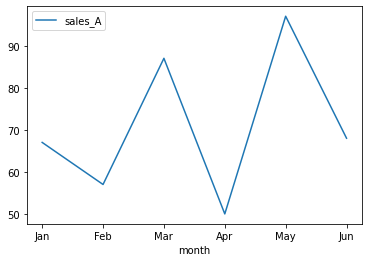

In [10]:
product_df.plot(x = "month", y = "sales_A")

- **DataFrame: multiple line chart****

<AxesSubplot:xlabel='month'>

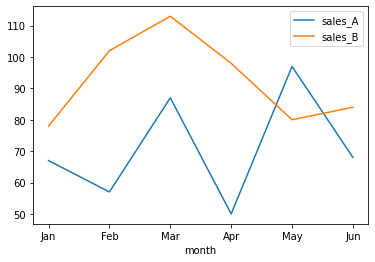

In [11]:
product_df.plot(x = "month", y= ["sales_A","sales_B"])

- **DataFrame - custom style**

<AxesSubplot:xlabel='month'>

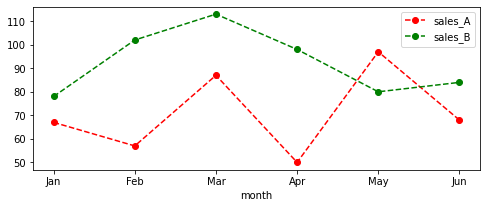

In [12]:
product_df.plot(x = "month",
                y = ["sales_A","sales_B"], 
                marker = "o", 
                color = ["red","green"],
                linestyle = 'dashed',
                figsize = (8,3))

## Exercise.A

**(A.1) Given the dataframe <code>expense_df</code>. Convert the dataframe to the following format (wide-form) and store the result in a new variable named <code>expense_df_wide</code>.**

||grocery|transportation|
|:-:|:-:|:-:|
|**01-2022**|3050|1050|
|**02-2022**|2800|900|
|**03-2022**|2750|1150|
|**04-2022**|2300|1850|
|**05-2022**|3150|1250|
|**06-2022**|2900|950|

In [13]:
expense_df = pd.DataFrame({'month':['01-2022','02-2022','03-2022','04-2022','05-2022','06-2022', '01-2022','02-2022','03-2022','04-2022','05-2022','06-2022'],
                            'expense':[3050, 2800, 2750, 2300, 3150, 2900,1050, 900, 1150, 1850, 1250, 950],
                            'category':['grocery', 'grocery', 'grocery', 'grocery', 'grocery', 'grocery', 'transportation','transportation','transportation','transportation','transportation','transportation']})
expense_df

,month,expense,category
0,01-2022,3050,grocery
1,02-2022,2800,grocery
2,03-2022,2750,grocery
3,04-2022,2300,grocery
4,05-2022,3150,grocery
5,06-2022,2900,grocery
6,01-2022,1050,transportation
7,02-2022,900,transportation
8,03-2022,1150,transportation
9,04-2022,1850,transportation


**(A.2) Use the dataframe <code>expense_df_wide</code> obtained in (A.1). Draw a multiple line chart to show the monthly groceries and transportation expenses.**

**(A.4) Import dataset <code>fashion.csv</code>. Show the first five rows.**<br>

**(A.4) Show the sales trends of <code>Tiger_of_Sweden</code> with a line chart.**

**(A.5) Show the sales trends of <code>Eton</code>, <code>Levi_s</code>, and <code>Tiger_of_Sweden</code> with a multiple line chart.**<br>
Settings: Use <code>marker = "D"</code>, <code>figsize = (12,4)</code>. 

### [2.2] Bar chart

- **Series**

<AxesSubplot:>

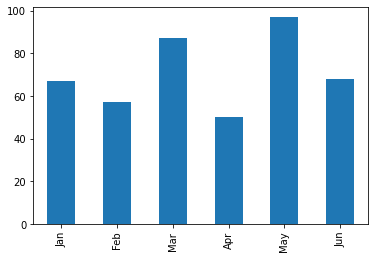

In [14]:
series_A.plot(kind = 'bar')

<AxesSubplot:>

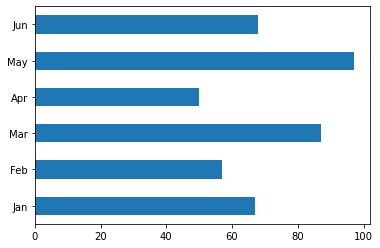

In [15]:
series_A.plot(kind = 'barh')

- **DataFrame: single bar chart**

<AxesSubplot:xlabel='month'>

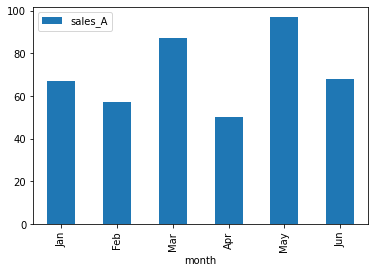

In [16]:
product_df.plot(kind = "bar", x= "month", y = "sales_A")

- **DataFrame: multiple bars**

<AxesSubplot:xlabel='month'>

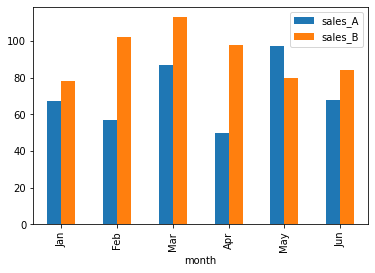

In [17]:
product_df.plot(kind = "bar", x = "month", y= ["sales_A","sales_B"])

- **DataFrame - stacked bar chart**

<AxesSubplot:xlabel='month'>

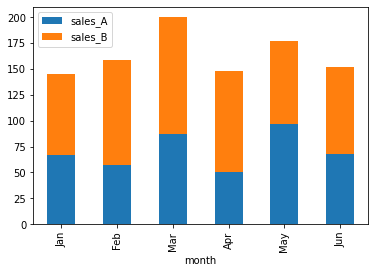

In [18]:
product_df.plot(kind = "bar", x = "month", y = ["sales_A","sales_B"], stacked = True)

### [2.3] Area

- **Stacked area chart**

<AxesSubplot:xlabel='month'>

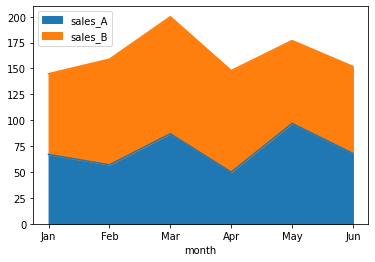

In [19]:
product_df.plot(kind = "area",  
                x = "month", 
                y = ["sales_A","sales_B"])  #By default, stacked = False

- **Unstacked area chart**

<AxesSubplot:xlabel='month'>

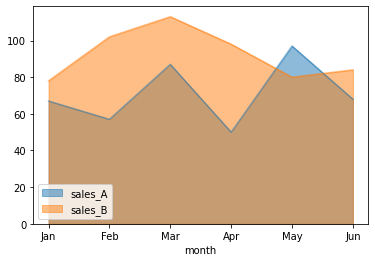

In [20]:
product_df.plot(kind = "area", 
                x = "month", 
                y = ["sales_A","sales_B"], 
                stacked = False)

### [2.4] Pie chart

In [21]:
spend_df = pd.DataFrame({'Jan':[1050, 250, 850, 3750],
                         'Feb':[1750, 850, 1050, 3050],
                         'Mar':[1150, 450, 950, 3250]},
                         index = ['transportation','dining out',"entertainment", 'grocery'])
spend_df

,Jan,Feb,Mar
transportation,1050,1750,1150
dining out,250,850,450
entertainment,850,1050,950
grocery,3750,3050,3250


- **One pie chart**

<AxesSubplot:ylabel='Jan'>

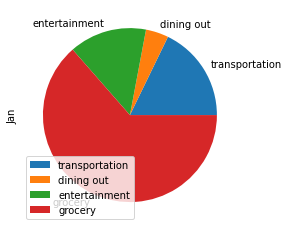

In [22]:
spend_df.plot(kind = "pie", y = "Jan")

<bound method Axes.legend of <AxesSubplot:ylabel='Jan'>>

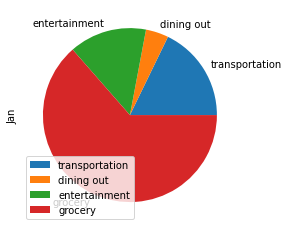

In [23]:
spend_df.plot(kind = "pie", y = "Jan").legend

- **Multiple pie charts**

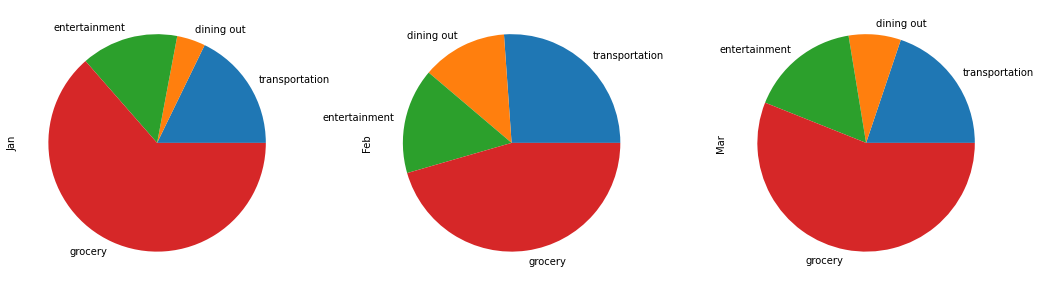

In [24]:
spend_df.plot.pie(subplots = True , figsize=(18,5), legend = False);

## Exercise.B

**(B.1) Import dataset <code>parks.csv</code>. Show the first five rows.**

**(B.2) Select the national parks in the following five states and keep columns <code>Park Name</code>, <code>State</code>, and <code>Acres</code>. Use this subset to answer the following questions.**<br>
State: CA, CO, UT, AK, WA

**(B.3) Count the number of national parks in each state. Display the result using a bar graph.**<br>
Hint: (1) Group data using column "State". (2) The x-axis shows each state, and each bar is the number of national parks in each state.

**(B.4) Calculate the total area of national parks in each state. Display the result using a pie chart.**

## [3] Numerical data

In [25]:
diabetes_df = pd.read_csv("../dataset/diabetes.csv", dtype = {"Outcome":object})
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# Select observations with pressure greater than 0 (remove outliers)
diabetes_df = diabetes_df[diabetes_df.BloodPressure>0]

### [3.1] Histogram

- **Show the distribution of numerical data**

<AxesSubplot:ylabel='Frequency'>

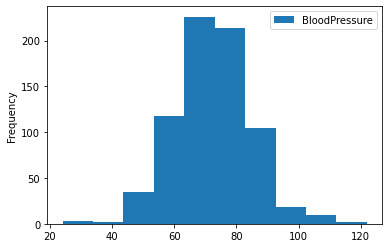

In [27]:
diabetes_df.plot(kind = "hist", y = "BloodPressure")

In [28]:
print("min:", diabetes_df.BloodPressure.min())
print("max:", diabetes_df.BloodPressure.max())
print("bin width:", (diabetes_df.BloodPressure.max()-diabetes_df.BloodPressure.min())/10)

min: 24
max: 122
bin width: 9.8


- **Custom bins**

<AxesSubplot:ylabel='Frequency'>

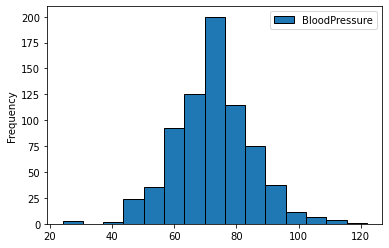

In [29]:
diabetes_df.plot(kind = "hist", 
                 y = "BloodPressure", 
                 bins = 15, 
                 edgecolor = "black")

<AxesSubplot:ylabel='Frequency'>

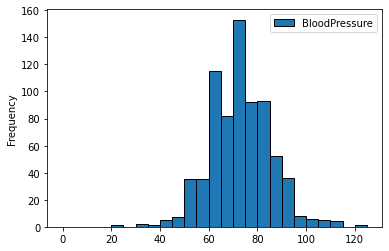

In [30]:
diabetes_df.plot(kind = "hist", 
                 y = "BloodPressure", 
                 bins = range(0,130,5), 
                 edgecolor = "black")

### [3.2] Scatter plot

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

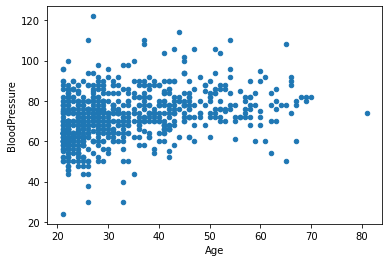

In [31]:
diabetes_df.plot(kind = "scatter", x ="Age", y= "BloodPressure")

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

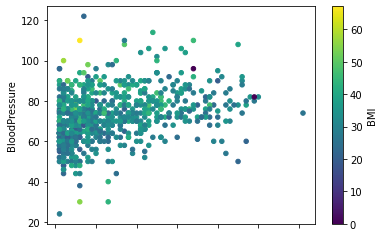

In [32]:
diabetes_df.plot(kind = "scatter", x ="Age", y= "BloodPressure", c= "BMI", cmap = "viridis")

### [3.3] Hexagon plot

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

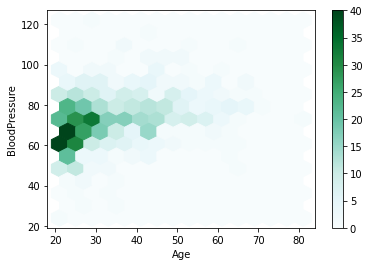

In [33]:
diabetes_df.plot(kind = "hexbin", x ="Age", y= "BloodPressure", gridsize = 15, sharex=False)

## Exercise.C

**(C.1) Import dataset <code>wine.csv</code> and set the first column as the index. Display the first 5 rows.** <br>
Hint: <code>index_col = [0]</code>

Description of each column
- **country**: The country that the wine is from
- **description**: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- **designation**: The vineyard within the winery where the grapes that made the wine are from
- **points**: The number of points WineEnthusiast rated the wine on a scale of 1-100
- **price**: The cost for a bottle of the wine
- **province**: The province or state that the wine is from
- **region_1**: The wine growing area in a province or state
- **region_2**: Sometimes there are more specific regions specified within a wine growing area, but this value can sometimes be blank
- **variety**: The type of grapes used to make the wine
- **winery**: The winery that made the wine

**(C.2) Select a subset that satisfies the following two conditions. Use this subset for the following tasks.**<br>
- Select wines (rows) from Spain, Italy or France (use column <code>country</code>).
- Select wines (rows) with a price of less than 200(use column <code>price</code>).

**(C.3) Use a histogram to show the price distribution of French wines.**<br>
Hint: Use column <code>price</code>.

**(C.4) Use a scatter plot to show the relationship between price and the points received in the review.**<br>
Hint: Use column <code>price</code> and <code>points</code>.

**(C.5) Use a hexagon plot to show the relationship between wine cost and the number of points recieved in the review.**<br>
Setting: Use gridsize = 20</code>.